## Task-D: Collinear features and their effect on linear models

In [9]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('task_d.csv')

In [3]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [4]:
X1 = data.drop(['target'],axis=1)
Y1 = data['target']
X = data.drop(['target'], axis=1).values
Y = data['target'].values
print(data['target'].nunique())

2


In [5]:
Y = Y.reshape(-1,1)
print(X.shape,Y.shape)

(100, 7) (100, 1)


### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

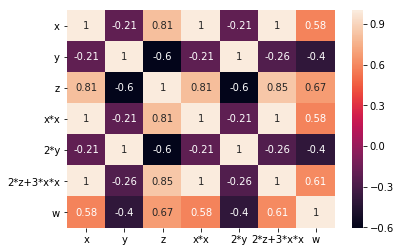

In [6]:
#heat map for correlation of the data

sns.heatmap(X1.corr(), annot = True)

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,stratify =Y ,test_size = 0.33)

In [10]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

params = {'alpha': [0.001,0.01,0.1,10,100,1000]}
k = 4

clf = SGDClassifier(loss = 'log')
clf1 = GridSearchCV(clf,param_grid = params,cv = k)
clf1.fit(X_train,Y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='log', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [11]:
clf1.best_params_

{'alpha': 0.01}

In [12]:
#Random search
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

params1 = {'alpha' : uniform(loc = 0,scale = 1000)}
clf2 = RandomizedSearchCV(clf,param_distributions = params1,cv = k)
clf2.fit(X_train,Y_train)

RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal', loss='log',
                                           max_iter=1000, n_iter_no_change=5,
                                           n_jobs=None, penalty='l2',
                                           power_t=0.5, random_state=None,
                                           shuffle=True, tol=0.001,
                                           validation_fraction=0.1, verbose=0,
                                           warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'a

In [13]:
clf2.best_params_

{'alpha': 313.27027369267824}

In [14]:
#here we are going with alpha value of 0.01 from GridSearchCV

best_model = SGDClassifier(loss = 'log',alpha = 0.01)
best_model.fit(X_train,Y_train)
Y_pred = best_model.predict(X_test)

In [15]:
W1 = best_model.coef_
W1

array([[ 0.81866815, -0.81859759,  1.67756118,  0.76693894, -0.81859759,
         0.89278774,  0.47178502]])

In [16]:
X_train+=0.01
best_model = SGDClassifier(loss = 'log',alpha = 0.01)
best_model.fit(X_train,Y_train)
Y_pred = best_model.predict(X_test)

In [17]:
W2 = best_model.coef_
W2

array([[ 0.83391226, -0.82777966,  1.61416753,  0.82238252, -0.82777966,
         0.93508036,  0.43592482]])

In [18]:
W = abs(W1-W2)
lst2 = sum(W)
sum_val = sum(sum(W))
sum_val

lst3 = list((lst2/sum_val)*100)
lst3

[6.610674431305179,
 3.9818475774162456,
 27.49094431024543,
 24.04336122100457,
 3.9818475774162456,
 18.3403859822041,
 15.550938900408227]

In [19]:
lst1 = list(data.columns)
lst1

['x', 'y', 'z', 'x*x', '2*y', '2*z+3*x*x', 'w', 'target']

In [20]:
hash_table = dict(zip(lst3,lst1))
hash_table

{6.610674431305179: 'x',
 3.9818475774162456: '2*y',
 27.49094431024543: 'z',
 24.04336122100457: 'x*x',
 18.3403859822041: '2*z+3*x*x',
 15.550938900408227: 'w'}

In [23]:
#top four features
top_feature = sorted(lst3)
for i in range(4):
    print(hash_table[top_feature[i]])

2*y
2*y
x
w
